In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import glob, os
import numpy as np
import gc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import Sequence
import random
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import psutil


(17931, 96, 96) (6000, 3)


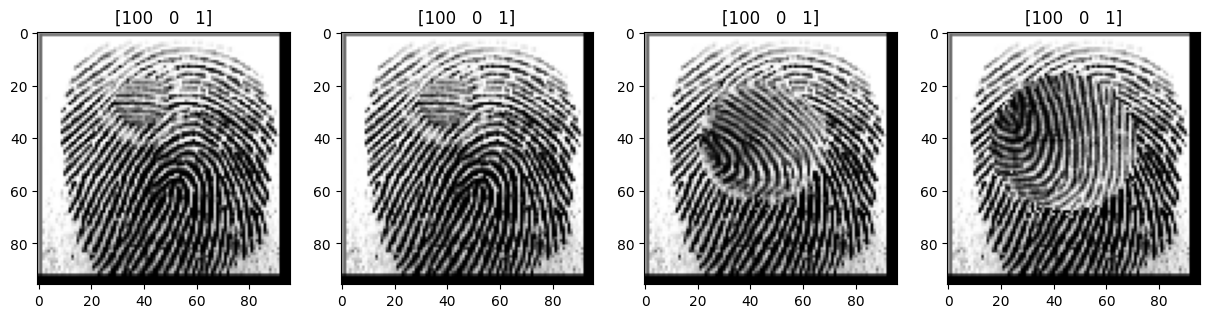

In [2]:
x_real = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_easy.npz')['data']
x_easy = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_easy.npz')['data']
x_medium = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_medium.npz')['data']
x_hard = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/x_hard.npz')['data']
y_real = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_real.npy')
y_easy = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_easy.npy')
y_medium = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_medium.npy')
y_hard = np.load('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/dataset/y_hard.npy')

print(x_real.shape, y_real.shape)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)

plt.title(y_real[0])
plt.imshow(x_real[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 2)

plt.title(y_easy[0])
plt.imshow(x_easy[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 3)

plt.title(y_medium[0])
plt.imshow(x_medium[0].squeeze(), cmap='gray')
plt.subplot(1, 4, 4)

plt.title(y_hard[0])
plt.imshow(x_hard[0].squeeze(), cmap='gray')


C:\Users\h4uh4\AppData\Roaming\Python\Python310\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


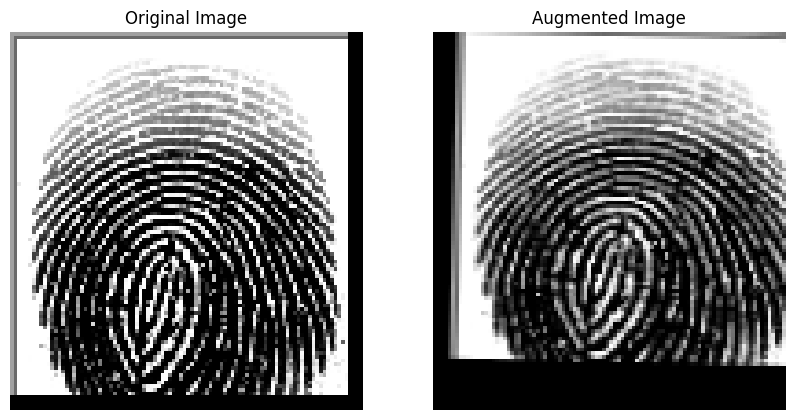

In [ ]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A


image = cv2.imread('C:/Users/h4uh4/OneDrive/Desktop/Skripsi_Bimbingan/Fingerprint/DataFinal/SOCOFing/Real/1__M_Left_index_finger.BMP')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Affine(scale=(0.9, 1.1), translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, rotate=(-5, 5), p=0.7),



])






augmented = augment(image=image)
augmented_image = augmented['image']


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')


plt.subplot(1, 2, 2)
plt.title("Augmented Image")
plt.imshow(augmented_image)
plt.axis('off')

plt.show()


In [ ]:

x_real = x_real[:len(y_real)]


x_data = np.concatenate([x_real, x_easy, x_medium, x_hard], axis=0)
y_data = np.concatenate([y_real, y_easy, y_medium, y_hard], axis=0)

print(f"x_data shape: {x_data.shape}")
print(f"y_data shape: {y_data.shape}")


half_size = len(x_data) // 2

x_data_half = x_data[:half_size]
y_data_half = y_data[:half_size]

print(f"x_data_half shape: {x_data_half.shape}")
print(f"y_data_half shape: {y_data_half.shape}")



assert x_data_half.shape[0] == y_data_half.shape[0], "Jumlah sample x_data dan y_data tidak sama!"


x_temp, x_test, y_temp, y_test = train_test_split(x_data_half, y_data_half, test_size=0.2, random_state=42)


x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)


print(f"Train set size: {x_train.shape[0]} samples")
print(f"Validation set size: {x_val.shape[0]} samples")
print(f"Test set size: {x_test.shape[0]} samples")


x_data shape: (55270, 96, 96)
y_data shape: (55270, 3)
x_data_half shape: (27635, 96, 96)
y_data_half shape: (27635, 3)
Train set size: 16581 samples
Validation set size: 5527 samples
Test set size: 5527 samples


In [ ]:

x_train = np.expand_dims(x_train, -1).astype('float32') / 255.
x_val = np.expand_dims(x_val, -1).astype('float32') / 255.
x_test = np.expand_dims(x_test, -1).astype('float32') / 255.


In [ ]:

def apply_gaussian_filter(image):

    return cv2.GaussianBlur(image, (5, 5), 0)


x_train_gaussian = np.array([apply_gaussian_filter(img.squeeze()) for img in x_train])
x_val_gaussian = np.array([apply_gaussian_filter(img.squeeze()) for img in x_val])
x_test_gaussian = np.array([apply_gaussian_filter(img.squeeze()) for img in x_test])


print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 65.7%


In [ ]:

def apply_gaussian_filter_batch(images_batch):
    return np.array([cv2.GaussianBlur(img.squeeze(), (5, 5), 0) for img in images_batch])


batch_size = 25
x_train_gaussian = []
for i in range(0, len(x_train), batch_size):
    x_train_gaussian.append(apply_gaussian_filter_batch(x_train[i:i+batch_size]))


x_train_gaussian = np.concatenate(x_train_gaussian, axis=0)


x_val_gaussian = []
for i in range(0, len(x_val), batch_size):
    x_val_gaussian.append(apply_gaussian_filter_batch(x_val[i:i+batch_size]))
x_val_gaussian = np.concatenate(x_val_gaussian, axis=0)

x_test_gaussian = []
for i in range(0, len(x_test), batch_size):
    x_test_gaussian.append(apply_gaussian_filter_batch(x_test[i:i+batch_size]))
x_test_gaussian = np.concatenate(x_test_gaussian, axis=0)


print(f"Memory usage: {psutil.virtual_memory().percent}%")

Memory usage: 65.6%


In [ ]:
import gc


gc.collect()


117

In [ ]:

x_train_gaussian = np.expand_dims(x_train_gaussian, -1).astype('float32') / np.nanmax(x_train_gaussian)
x_val_gaussian = np.expand_dims(x_val_gaussian, -1).astype('float32') / np.nanmax(x_val_gaussian)
x_test_gaussian = np.expand_dims(x_test_gaussian, -1).astype('float32') / np.nanmax(x_test_gaussian)


In [ ]:
from tensorflow.keras.utils import Sequence


class PairGenerator(Sequence):
    def __init__(self, x, y, x_real, y_real, batch_size=32, augment_fn=None):
        self.x = x
        self.y = y
        self.x_real = x_real
        self.y_real = y_real
        self.batch_size = batch_size
        self.augment_fn = augment_fn


        self.label_real_dict = {}
        for idx, label in enumerate(self.y_real):
            key = ''.join(label.astype(str)).zfill(6)
            if key not in self.label_real_dict:
                self.label_real_dict[key] = []
            self.label_real_dict[key].append(idx)

        self.label_keys = list(self.label_real_dict.keys())

    def __len__(self):
        return int(np.ceil(len(self.x) / self.batch_size))

    def __getitem__(self, index):
        start = index * self.batch_size
        end = min((index + 1) * self.batch_size, len(self.x))

        x1_batch = self.x[start:end]
        y_batch = self.y[start:end]
        batch_size = len(x1_batch)

        x2_batch = np.empty_like(x1_batch)
        labels = np.zeros((batch_size, 1), dtype=np.float32)

        for i, label in enumerate(y_batch):
            key = ''.join(label.astype(str)).zfill(6)

            if random.random() > 0.5 and key in self.label_real_dict:
                idx = random.choice(self.label_real_dict[key])
                x2 = self.x_real[idx]
                labels[i] = 1.
            else:
                while True:
                    unmatch_key = random.choice(self.label_keys)
                    if unmatch_key != key:
                        idx = random.choice(self.label_real_dict[unmatch_key])
                        x2 = self.x_real[idx]
                        break
                labels[i] = 0.

            x2_batch[i] = x2


            if self.augment_fn:
                x1_batch[i] = self.augment_fn(image=x1_batch[i].squeeze())['image'][..., np.newaxis]
                x2_batch[i] = self.augment_fn(image=x2_batch[i].squeeze())['image'][..., np.newaxis]

        return (x1_batch, x2_batch), labels


pair_generator = PairGenerator(x_train_gaussian, y_train, x_train_gaussian, y_train, batch_size=32)


(x1_batch, x2_batch), labels = pair_generator[0]

In [ ]:

def build_feature_model(input_shape=(96, 96, 1)):
    input_layer = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu')(input_layer)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    model = models.Model(inputs=input_layer, outputs=x)
    return model


x1 = layers.Input(shape=(96, 96, 1))
x2 = layers.Input(shape=(96, 96, 1))


feature_model = build_feature_model()
f1 = feature_model(x1)
f2 = feature_model(x2)


diff = layers.Subtract()([f1, f2])


x = layers.Dense(128, activation='relu')(diff)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)


model = models.Model(inputs=[x1, x2], outputs=output)


model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 96, 96, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional          │ (None, 64)        │  8,012,736 │ input_layer[0][0… │
│ (Functional)        │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract (Subtract) │ (None, 64)        │          0 │ functional[0][0], │
│                     │                   │            │ functional[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │      8,320 │ subtract[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      8,256 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         65 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,029,377 (30.63 MB)

 Trainable params: 8,029,377 (30.63 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
train_gen = PairGenerator(x_train_gaussian, y_train, x_train_gaussian, y_train, batch_size=32, augment_fn=augment)
val_gen = PairGenerator(x_val, y_val, x_val, y_val, batch_size=32, augment_fn=None)


Batch 1:
x1 batch shape: (32, 96, 96, 1)
x2 batch shape: (32, 96, 96, 1)
Labels shape: (32, 1)


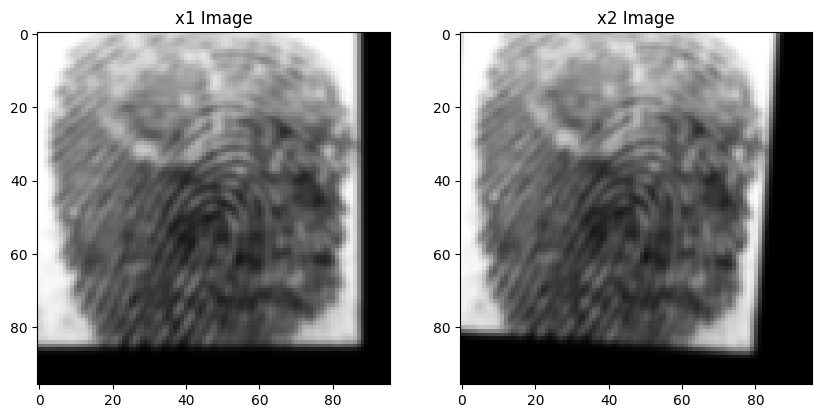

Batch 2:
x1 batch shape: (32, 96, 96, 1)
x2 batch shape: (32, 96, 96, 1)
Labels shape: (32, 1)


In [ ]:
import matplotlib.pyplot as plt


for i, (inputs, labels) in enumerate(train_gen):

    print(f"Batch {i + 1}:")
    print(f"x1 batch shape: {inputs[0].shape}")
    print(f"x2 batch shape: {inputs[1].shape}")
    print(f"Labels shape: {labels.shape}")


    if i == 0:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(inputs[0][0].squeeze(), cmap='gray')
        plt.title('x1 Image')

        plt.subplot(1, 2, 2)
        plt.imshow(inputs[1][0].squeeze(), cmap='gray')
        plt.title('x2 Image')

        plt.show()


    if i >= 1:
        break

In [ ]:

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])


early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('nonkernel_siamese_best.h5', save_best_only=True, monitor='val_loss')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,  
    callbacks=[checkpoint, early_stop, lr_scheduler],
    verbose=2  
)




Epoch 1/5


c:\Users\h4uh4\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


519/519 - 202s - 389ms/step - accuracy: 0.7200 - auc: 0.7779 - loss: 0.5780 - val_accuracy: 0.8487 - val_auc: 0.9265 - val_loss: 0.3827 - learning_rate: 1.0000e-03
Epoch 2/5
519/519 - 223s - 430ms/step - accuracy: 0.7565 - auc: 0.8121 - loss: 0.5176 - val_accuracy: 0.8037 - val_auc: 0.9237 - val_loss: 0.4409 - learning_rate: 1.0000e-03
Epoch 3/5
519/519 - 226s - 435ms/step - accuracy: 0.7676 - auc: 0.8236 - loss: 0.4968 - val_accuracy: 0.8209 - val_auc: 0.9301 - val_loss: 0.4123 - learning_rate: 1.0000e-03
Epoch 4/5


519/519 - 228s - 439ms/step - accuracy: 0.7721 - auc: 0.8240 - loss: 0.4922 - val_accuracy: 0.8692 - val_auc: 0.9219 - val_loss: 0.3324 - learning_rate: 1.0000e-03
Epoch 5/5


519/519 - 222s - 428ms/step - accuracy: 0.7644 - auc: 0.8213 - loss: 0.4956 - val_accuracy: 0.8855 - val_auc: 0.9267 - val_loss: 0.3069 - learning_rate: 1.0000e-03


In [ ]:

model.save('C:/Users/h4uh4/OneDrive/Desktop/FinalCompareFriedman/Model_Siamese/ModelSiam/gaussian_final_model.keras')



Shapes: (5527, 96, 96, 1) (5527, 96, 96, 1) (5527, 1)


c:\Users\h4uh4\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
  0%|          | 0/100 [00:00<?, ?it/s]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step


  1%|          | 1/100 [00:15<25:31, 15.46s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


  2%|▏         | 2/100 [00:30<24:50, 15.21s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step


  3%|▎         | 3/100 [00:45<24:19, 15.05s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step


  4%|▍         | 4/100 [01:00<23:57, 14.98s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step


  5%|▌         | 5/100 [01:15<23:38, 14.93s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step


  6%|▌         | 6/100 [01:29<23:21, 14.91s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step


  7%|▋         | 7/100 [01:45<23:39, 15.27s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step


  8%|▊         | 8/100 [02:01<23:42, 15.46s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step


  9%|▉         | 9/100 [02:16<23:09, 15.27s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 10%|█         | 10/100 [02:31<22:54, 15.28s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step


 11%|█         | 11/100 [02:47<22:43, 15.32s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 12%|█▏        | 12/100 [03:02<22:23, 15.26s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step


 13%|█▎        | 13/100 [03:18<22:22, 15.43s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step


 14%|█▍        | 14/100 [03:33<22:08, 15.45s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step


 15%|█▌        | 15/100 [03:49<21:55, 15.47s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step


 16%|█▌        | 16/100 [04:04<21:19, 15.24s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 17%|█▋        | 17/100 [04:19<21:01, 15.19s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 18%|█▊        | 18/100 [04:34<20:41, 15.14s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step


 19%|█▉        | 19/100 [04:48<20:16, 15.02s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 20%|██        | 20/100 [05:03<20:03, 15.04s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 21%|██        | 21/100 [05:19<19:54, 15.12s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 22%|██▏       | 22/100 [05:34<19:40, 15.14s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step


 23%|██▎       | 23/100 [05:49<19:15, 15.01s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step


 24%|██▍       | 24/100 [06:04<18:57, 14.96s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 25%|██▌       | 25/100 [06:19<18:44, 15.00s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 26%|██▌       | 26/100 [06:34<18:33, 15.04s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step


 27%|██▋       | 27/100 [06:49<18:14, 15.00s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step


 28%|██▊       | 28/100 [07:04<17:57, 14.96s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 29%|██▉       | 29/100 [07:18<17:42, 14.96s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step


 30%|███       | 30/100 [07:33<17:24, 14.92s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step


 31%|███       | 31/100 [07:49<17:21, 15.09s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step


 32%|███▏      | 32/100 [08:04<17:13, 15.21s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step


 33%|███▎      | 33/100 [08:20<17:12, 15.41s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step


 34%|███▍      | 34/100 [08:36<16:57, 15.41s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 35%|███▌      | 35/100 [08:51<16:36, 15.33s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 36%|███▌      | 36/100 [09:06<16:15, 15.25s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step


 37%|███▋      | 37/100 [09:21<15:51, 15.11s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step


 38%|███▊      | 38/100 [09:35<15:29, 15.00s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step


 39%|███▉      | 39/100 [09:50<15:10, 14.93s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 40%|████      | 40/100 [10:05<14:56, 14.94s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 41%|████      | 41/100 [10:20<14:43, 14.97s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step


 42%|████▏     | 42/100 [10:35<14:23, 14.88s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step


 43%|████▎     | 43/100 [10:50<14:06, 14.85s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step


 44%|████▍     | 44/100 [11:04<13:49, 14.81s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 45%|████▌     | 45/100 [11:19<13:37, 14.86s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 46%|████▌     | 46/100 [11:34<13:23, 14.88s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 47%|████▋     | 47/100 [11:49<13:13, 14.96s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 48%|████▊     | 48/100 [12:04<12:59, 14.99s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step


 49%|████▉     | 49/100 [12:20<12:51, 15.14s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 50%|█████     | 50/100 [12:35<12:35, 15.10s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step


 51%|█████     | 51/100 [12:50<12:24, 15.19s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 52%|█████▏    | 52/100 [13:06<12:10, 15.22s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 53%|█████▎    | 53/100 [13:21<11:53, 15.19s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 54%|█████▍    | 54/100 [13:36<11:37, 15.17s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step


 55%|█████▌    | 55/100 [13:51<11:25, 15.22s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 56%|█████▌    | 56/100 [14:06<11:10, 15.24s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step


 57%|█████▋    | 57/100 [14:22<10:58, 15.32s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 58%|█████▊    | 58/100 [14:37<10:41, 15.28s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 59%|█████▉    | 59/100 [14:52<10:24, 15.23s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 60%|██████    | 60/100 [15:07<10:08, 15.20s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 61%|██████    | 61/100 [15:22<09:50, 15.15s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step


 62%|██████▏   | 62/100 [15:37<09:32, 15.08s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 63%|██████▎   | 63/100 [15:52<09:17, 15.06s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step


 64%|██████▍   | 64/100 [16:07<09:00, 15.02s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 65%|██████▌   | 65/100 [16:22<08:45, 15.02s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 66%|██████▌   | 66/100 [16:37<08:30, 15.01s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 67%|██████▋   | 67/100 [16:52<08:14, 14.99s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step


 68%|██████▊   | 68/100 [17:07<07:58, 14.96s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step


 69%|██████▉   | 69/100 [17:22<07:47, 15.08s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 70%|███████   | 70/100 [17:37<07:31, 15.05s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 71%|███████   | 71/100 [17:52<07:16, 15.05s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 72%|███████▏  | 72/100 [18:08<07:01, 15.05s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 73%|███████▎  | 73/100 [18:22<06:45, 15.03s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 74%|███████▍  | 74/100 [18:38<06:31, 15.05s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 75%|███████▌  | 75/100 [18:53<06:17, 15.08s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step


 76%|███████▌  | 76/100 [19:08<06:00, 15.02s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 77%|███████▋  | 77/100 [19:23<05:45, 15.02s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 78%|███████▊  | 78/100 [19:38<05:31, 15.05s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 79%|███████▉  | 79/100 [19:53<05:15, 15.04s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 80%|████████  | 80/100 [20:08<05:01, 15.06s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step


 81%|████████  | 81/100 [20:23<04:47, 15.14s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 82%|████████▏ | 82/100 [20:38<04:31, 15.10s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 83%|████████▎ | 83/100 [20:53<04:17, 15.13s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step


 84%|████████▍ | 84/100 [21:08<04:01, 15.07s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step


 85%|████████▌ | 85/100 [21:24<03:47, 15.17s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 86%|████████▌ | 86/100 [21:39<03:31, 15.11s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 87%|████████▋ | 87/100 [21:54<03:16, 15.11s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 88%|████████▊ | 88/100 [22:09<03:01, 15.10s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 89%|████████▉ | 89/100 [22:24<02:46, 15.11s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 90%|█████████ | 90/100 [22:39<02:31, 15.11s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 91%|█████████ | 91/100 [22:54<02:15, 15.09s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 92%|█████████▏| 92/100 [23:09<02:00, 15.05s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 93%|█████████▎| 93/100 [23:24<01:45, 15.06s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 94%|█████████▍| 94/100 [23:39<01:30, 15.03s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 95%|█████████▌| 95/100 [23:54<01:15, 15.06s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 96%|█████████▌| 96/100 [24:10<01:00, 15.11s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step


 97%|█████████▋| 97/100 [24:25<00:45, 15.13s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step


 98%|█████████▊| 98/100 [24:41<00:30, 15.35s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


 99%|█████████▉| 99/100 [24:56<00:15, 15.23s/it]

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step


100%|██████████| 100/100 [25:11<00:00, 15.11s/it]

Bootstrap AUC mean: 0.9286
95% Confidence Interval: [0.9222, 0.9375]
Indices dipilih: [ 0 24 49 74 99]
Nilai AUC diambil: [0.93087163 0.93153826 0.9296796  0.92986307 0.92879024]


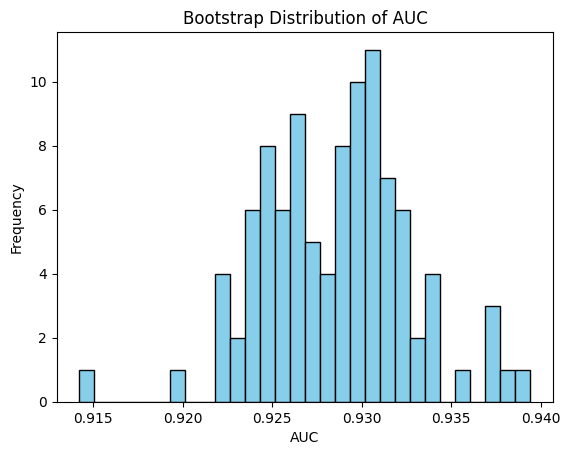

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tqdm import tqdm


test_gen = PairGenerator(x_test_gaussian, y_test, x_test_gaussian, y_test, batch_size=32, augment_fn=augment)

x1_list, x2_list, y_list = [], [], []
for i in range(len(test_gen)):
    (x1_batch, x2_batch), y_batch = test_gen[i]
    x1_list.append(x1_batch)
    x2_list.append(x2_batch)
    y_list.append(y_batch)

x_test_1 = np.concatenate(x1_list, axis=0)
x_test_2 = np.concatenate(x2_list, axis=0)
y_test_full = np.concatenate(y_list, axis=0)
y_test_full = y_test_full[:len(x_test_1)]

print("Shapes:", x_test_1.shape, x_test_2.shape, y_test_full.shape)


model_local = load_model('C:/Users/h4uh4/OneDrive/Desktop/FinalCompareFriedman/Model_Siamese/ModelSiam/gaussian_final_model.keras')

B = 100
n = len(x_test_1)
num_classes = len(np.unique(y_test_full))
results = []

for seed in tqdm(range(B), total=B):
    np.random.seed(seed)
    idx = np.random.choice(n, size=n, replace=True)
    x1_bs, x2_bs, y_bs = x_test_1[idx], x_test_2[idx], y_test_full[idx]

    y_pred_probs = model_local.predict([x1_bs, x2_bs], batch_size=32)
    y_bs_bin = label_binarize(y_bs, classes=range(num_classes))

    auc = roc_auc_score(y_bs_bin, y_pred_probs, multi_class='ovr', average='macro')
    results.append(auc)

auc_scores = np.array(results)
mean_auc = np.mean(auc_scores)
ci_lower, ci_upper = np.percentile(auc_scores, [2.5, 97.5])

print(f"Bootstrap AUC mean: {mean_auc:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


indices = np.linspace(0, len(auc_scores) - 1, 5, dtype=int)
sampled_aucs = auc_scores[indices]

print("Indices dipilih:", indices)
print("Nilai AUC diambil:", sampled_aucs)


with open("gaussian_bootstrap_auc_results.txt", "w") as f:
    f.write("Sampled 5 AUC values (berjarak):\n")
    for val in sampled_aucs:
        f.write(f"{val:.6f}\n")
    f.write("\n")
    f.write(f"Bootstrap AUC mean: {mean_auc:.4f}\n")
    f.write(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]\n\n")
    f.write("All Bootstrap AUC scores:\n")
    for val in auc_scores:
        f.write(f"{val:.6f}\n")


plt.hist(auc_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Bootstrap Distribution of AUC')
plt.xlabel('AUC')
plt.ylabel('Frequency')
plt.show()


c:\Users\h4uh4\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9019 - auc: 0.9345 - loss: 0.2909
Test Loss: 0.30422937870025635
Test Accuracy: 0.8941559791564941
Test AUC: 0.929226815700531


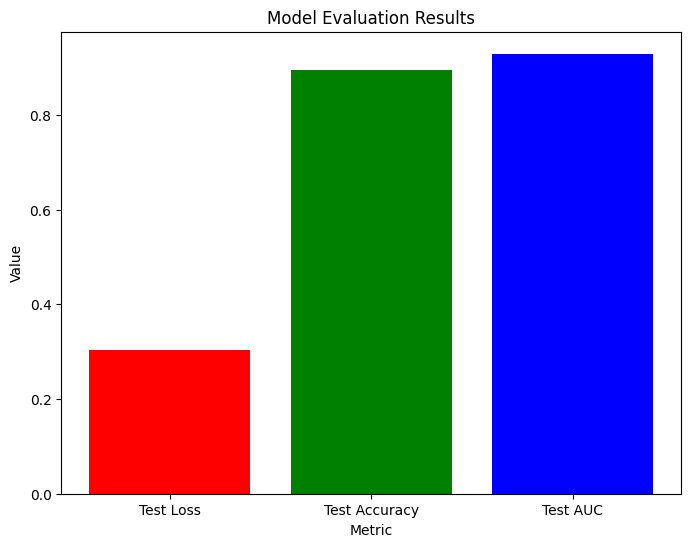

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

test_gen = PairGenerator(x_test_gaussian, y_test, x_test_gaussian, y_test, batch_size=32, augment_fn=None)


test_loss, test_accuracy, test_auc = model.evaluate(test_gen)


print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")


results = [test_loss, test_accuracy, test_auc]
labels = ['Test Loss', 'Test Accuracy', 'Test AUC']


plt.figure(figsize=(8, 6))
plt.bar(labels, results, color=['red', 'green', 'blue'])


plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Evaluation Results')


plt.show()
